In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, date 


#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#取消警告
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('dataset\Aquifer\Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
#在第一个Rainfall数据出现以前，仅有Depth_to_Groundwater_P24和Depth_to_Groundwater_P25以及少量的Temperature_Petrignano的数据
df1 = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [6]:
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


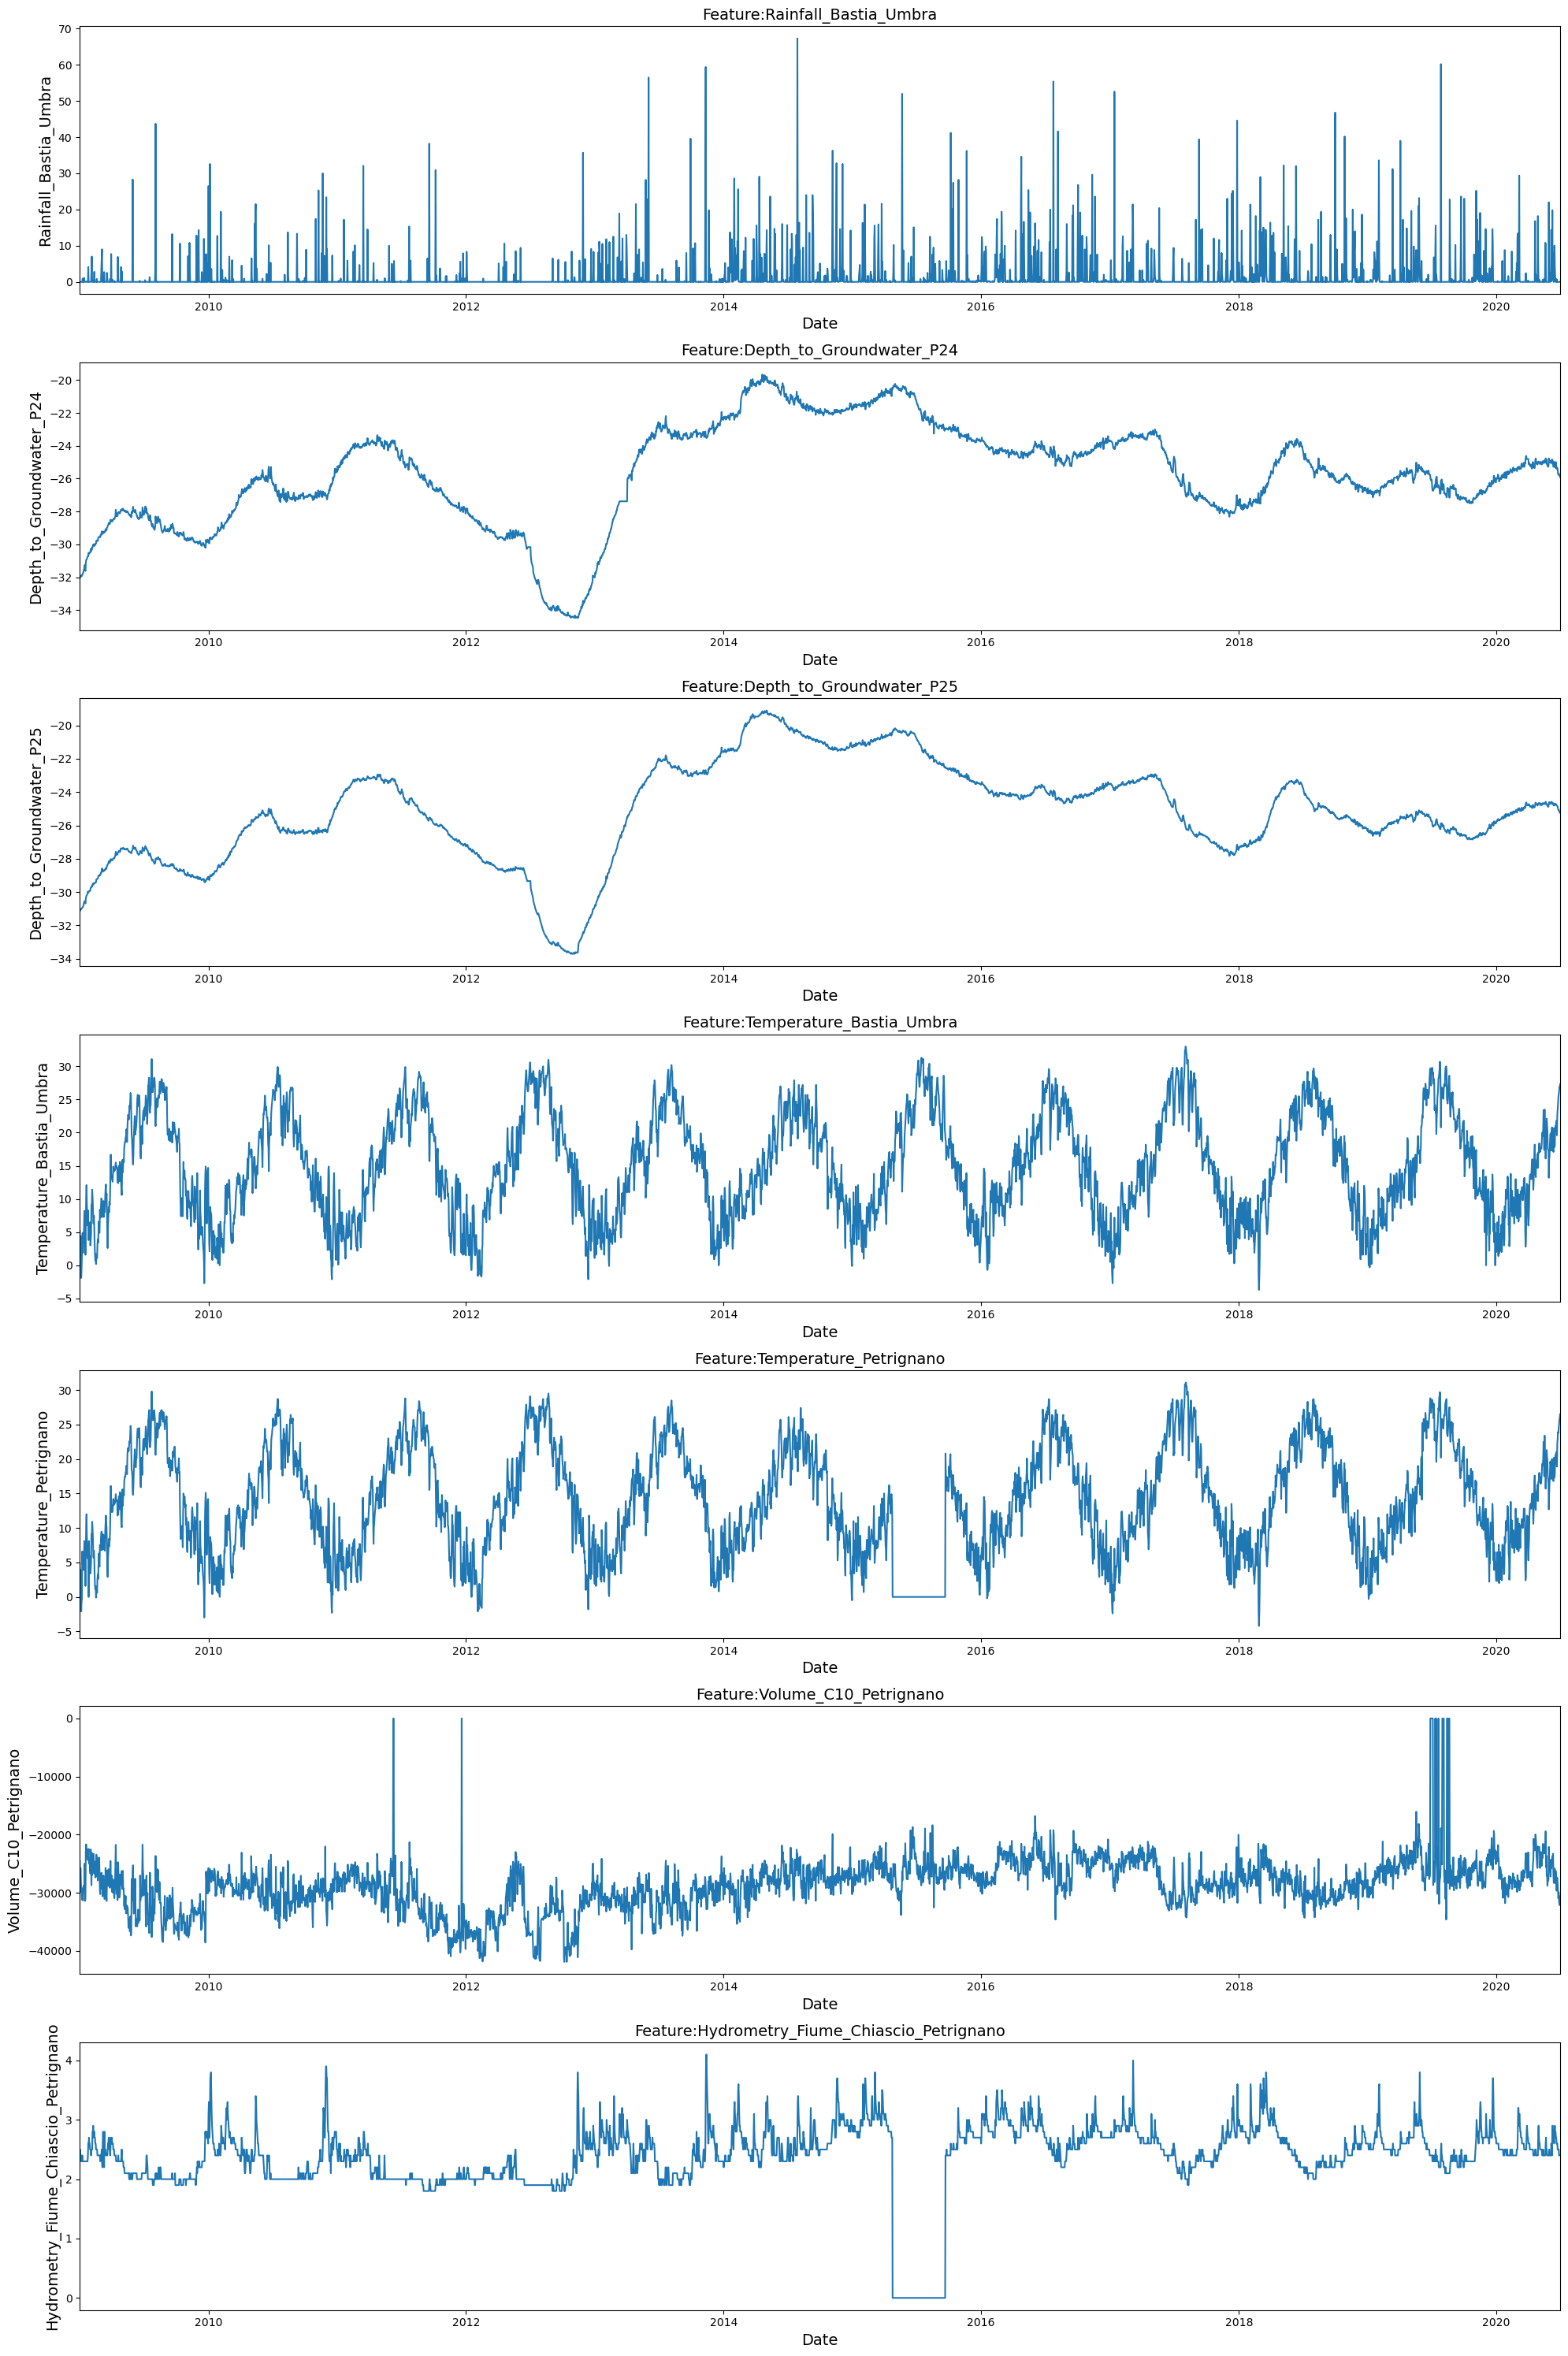

In [7]:
#出去日期有七列数据
f,ax = plt.subplots(nrows=7,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y,并且对其中缺失的数据用前一个数据进行填充
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column].fillna(method='ffill'),ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()
    
    

    

In [9]:
#统计缺失值的数量
df1.isna().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64